In [1]:
from utils.preprocessor import Preprocessor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Preprocess the Data

In [2]:
df_train = pd.read_csv(r'data\train.csv')
df_test = pd.read_csv(r'data\test.csv')

In [3]:
preprocessor = Preprocessor()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PrinceEGY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PrinceEGY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PrinceEGY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df_train['text'] = preprocessor(df_train.text)
df_train['text']

0       [deed, reason, earthquake, may, allah, forgive...
1           [forest, fire, near, la, ronge, sask, canada]
2       [resident, asked, shelter, place, notified, of...
3       [13000, people, receive, wildfire, evacuation,...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, holding, bridge, collapse,...
7609    [ariaahrary, thetawniest, control, wild, fire,...
7610                [m194, 0104, utc5km, volcano, hawaii]
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, home, razed, northern, california, wi...
Name: text, Length: 7613, dtype: object

## Train-test split

In [5]:
X = df_train[['text']]
y = df_train[['target']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=2023)

## Feature Extraction

### Binary Vectorizer

In [7]:
vec = CountVectorizer(binary= True)

In [8]:
X_train_joined = X_train.text.apply(lambda x: " ".join(x))
X_test_joined = X_test.text.apply(lambda x: " ".join(x))

In [9]:
vec.fit(X_train_joined)

CountVectorizer(binary=True)

In [10]:
X_train_vectorized = pd.DataFrame(vec.transform(X_train_joined).toarray(), columns=sorted(vec.vocabulary_.keys()))
X_test_vectorized = pd.DataFrame(vec.transform(X_test_joined).toarray(), columns=sorted(vec.vocabulary_.keys()))

In [11]:
X_train_vectorized.iloc[15:20, 1000:2000]

,anatomy,anchor,anchorage,ancient,ancop,and,anderson,andor,andre,andrea,...,brake,braking,branch,brand,brandonmulcahy,brant,brass,brasswork,brave,bravery
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [13]:
results = pd.DataFrame(columns=['Model Name','Model state','Train-Val Accuracy','Test Accuracy', "f1_score", 'Real Disaster Accuracy', 'Not Disaster Accuracy'])
def fit_model_result(X_train, y_train, X_test, y_test, model, model_name, features_method):
    clf = model
    clf.fit(X_train, y_train)
    
    cv = RepeatedStratifiedKFold(n_repeats=5, random_state=2023)
    train_accuracy = np.mean(cross_val_score(clf, X_train, y_train, scoring="accuracy", cv = cv, n_jobs=-1)) * 100
    test_accuracy = clf.score(X_test, y_test) * 100
    
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
    
    f1 = f1_score(y_test, y_pred) * 100
    
    # Adding result to the summary DataFrame
    results.loc[len(results.index)] = [model_name, features_method, train_accuracy, test_accuracy, f1, round(conf_mat[0][0], 2), round(conf_mat[1][1], 2)]
    
    print(results.iloc[-1,:])
    disp = ConfusionMatrixDisplay(conf_mat)
    disp.plot(cmap = "Greens")
    plt.title(model_name)
    plt.show()
    

In [14]:
NBmodel = MultinomialNB()
LRmodel = LogisticRegression()
SVCmodel = LinearSVC()
KNNmodel = KNeighborsClassifier()
XGBmodel = xgb.XGBClassifier()

In [15]:
models = {
    "Naive Bayes" : NBmodel,
    "Logistic Regression": LRmodel,
    "SVC" : SVCmodel,
    "KNN" : KNNmodel,
    "XGBoost" : XGBmodel,
    }

Model Name                      Naive Bayes
Model state               Binary Vectorizer
Train-Val Accuracy                78.476017
Test Accuracy                     81.144958
f1_score                          76.703439
Real Disaster Accuracy                 0.88
Not Disaster Accuracy                  0.72
Name: 0, dtype: object


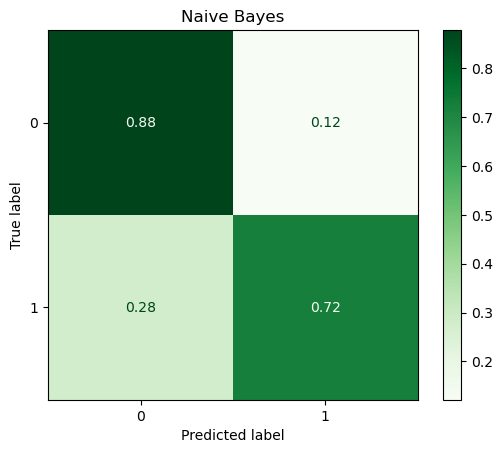

Model Name                Logistic Regression
Model state                 Binary Vectorizer
Train-Val Accuracy                  79.075171
Test Accuracy                       79.621849
f1_score                            74.440053
Real Disaster Accuracy                   0.88
Not Disaster Accuracy                    0.69
Name: 1, dtype: object


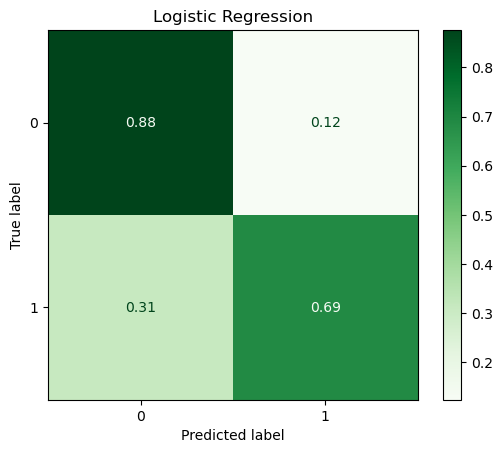

Model Name                              SVC
Model state               Binary Vectorizer
Train-Val Accuracy                76.875202
Test Accuracy                     77.363445
f1_score                          72.704243
Real Disaster Accuracy                 0.83
Not Disaster Accuracy                   0.7
Name: 2, dtype: object


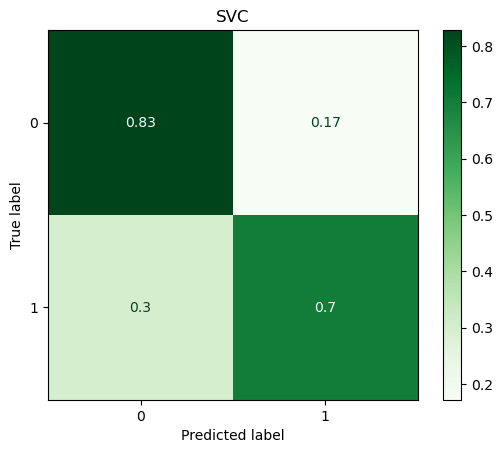

Model Name                              KNN
Model state               Binary Vectorizer
Train-Val Accuracy                67.202712
Test Accuracy                     69.642857
f1_score                          48.207885
Real Disaster Accuracy                 0.97
Not Disaster Accuracy                  0.33
Name: 3, dtype: object


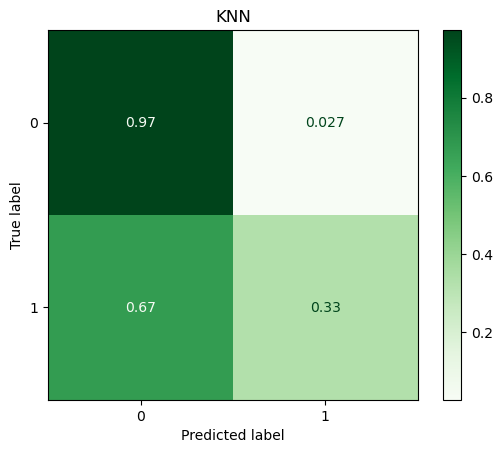

Model Name                          XGBoost
Model state               Binary Vectorizer
Train-Val Accuracy                77.670268
Test Accuracy                     78.781513
f1_score                          72.099448
Real Disaster Accuracy                  0.9
Not Disaster Accuracy                  0.64
Name: 4, dtype: object


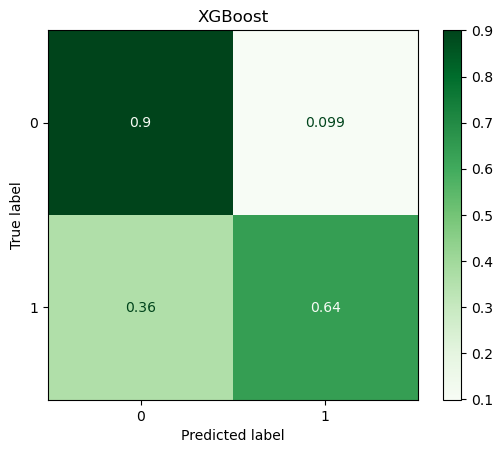

In [16]:
for model_name, model in models.items():
    fit_model_result(X_train_vectorized.values, y_train, X_test_vectorized.values, y_test, model, model_name, "Binary Vectorizer")

-----------
### Counting Vectorizer

In [17]:
vec = CountVectorizer()

In [18]:
X_train_joined = X_train.text.apply(lambda x: " ".join(x))
X_test_joined = X_test.text.apply(lambda x: " ".join(x))

In [19]:
vec.fit(X_train_joined)

CountVectorizer()

In [20]:
X_train_vectorized = pd.DataFrame(vec.transform(X_train_joined).toarray(), columns=sorted(vec.vocabulary_.keys()))
X_test_vectorized = pd.DataFrame(vec.transform(X_test_joined).toarray(), columns=sorted(vec.vocabulary_.keys()))

In [21]:
X_train_vectorized.iloc[15:20, 1000:2000]

,anatomy,anchor,anchorage,ancient,ancop,and,anderson,andor,andre,andrea,...,brake,braking,branch,brand,brandonmulcahy,brant,brass,brasswork,brave,bravery
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
NBmodel = MultinomialNB()
LRmodel = LogisticRegression()
SVCmodel = LinearSVC()
KNNmodel = KNeighborsClassifier()
XGBmodel = xgb.XGBClassifier()

In [23]:
models = {
    "Naive Bayes" : NBmodel,
    "Logistic Regression": LRmodel,
    "SVC" : SVCmodel,
    "KNN" : KNNmodel,
    "XGBoost" : XGBmodel,
    }

Model Name                     Naive Bayes
Model state               Count Vectorizer
Train-Val Accuracy                78.58461
Test Accuracy                    80.672269
f1_score                         76.072822
Real Disaster Accuracy                0.88
Not Disaster Accuracy                 0.72
Name: 5, dtype: object


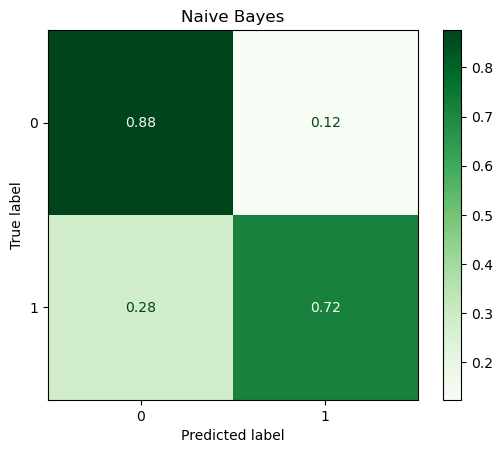

Model Name                Logistic Regression
Model state                  Count Vectorizer
Train-Val Accuracy                  78.928113
Test Accuracy                       79.726891
f1_score                            74.538259
Real Disaster Accuracy                   0.88
Not Disaster Accuracy                    0.69
Name: 6, dtype: object


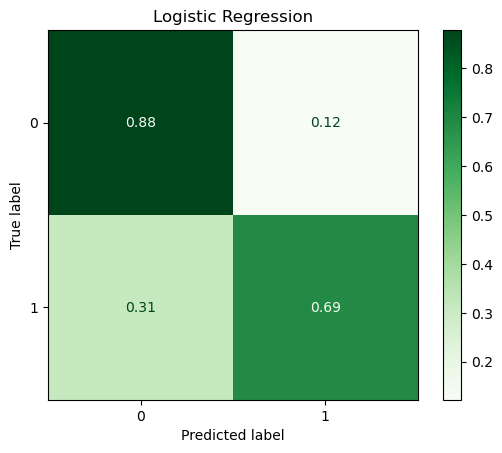

Model Name                             SVC
Model state               Count Vectorizer
Train-Val Accuracy               76.910232
Test Accuracy                    77.521008
f1_score                         72.634271
Real Disaster Accuracy                0.84
Not Disaster Accuracy                 0.69
Name: 7, dtype: object


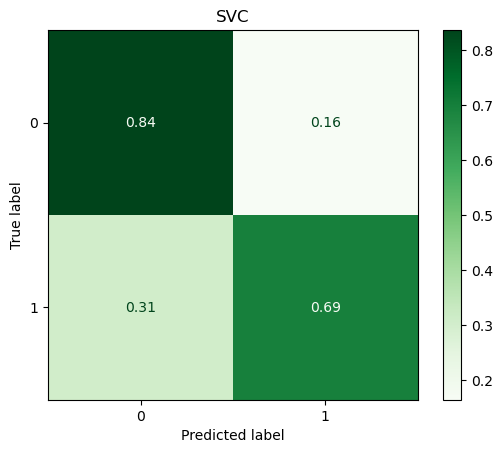

Model Name                             KNN
Model state               Count Vectorizer
Train-Val Accuracy               67.570491
Test Accuracy                    69.432773
f1_score                         47.849462
Real Disaster Accuracy                0.97
Not Disaster Accuracy                 0.33
Name: 8, dtype: object


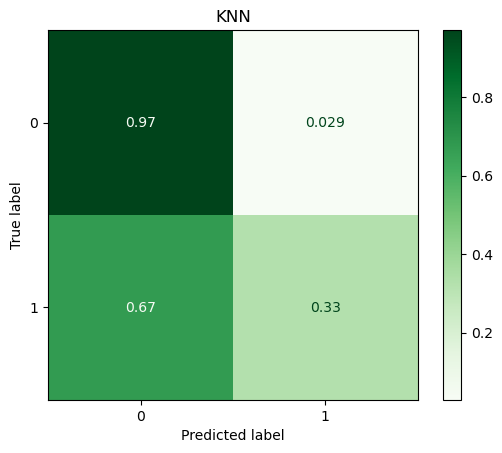

Model Name                         XGBoost
Model state               Count Vectorizer
Train-Val Accuracy                77.87347
Test Accuracy                    79.044118
f1_score                          72.23382
Real Disaster Accuracy                0.91
Not Disaster Accuracy                 0.63
Name: 9, dtype: object


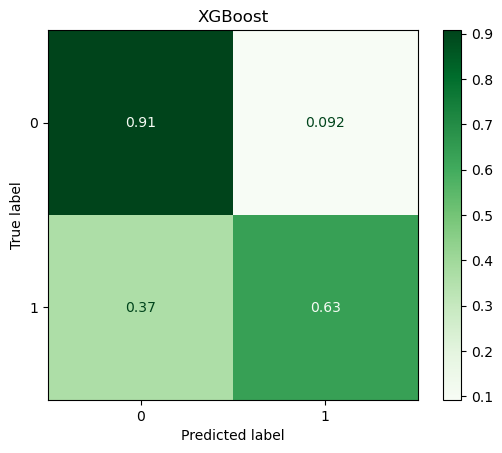

In [24]:
for model_name, model in models.items():
    fit_model_result(X_train_vectorized.values, y_train, X_test_vectorized.values, y_test, model, model_name, "Count Vectorizer")

-----------
### TF-IDF

In [25]:
vec = TfidfVectorizer()

In [26]:
X_train_joined = X_train.text.apply(lambda x: " ".join(x))
X_test_joined = X_test.text.apply(lambda x: " ".join(x))

In [27]:
vec.fit(X_train_joined)

TfidfVectorizer()

In [28]:
X_train_vectorized = pd.DataFrame(vec.transform(X_train_joined).toarray(), columns=sorted(vec.vocabulary_.keys()))
X_test_vectorized = pd.DataFrame(vec.transform(X_test_joined).toarray(), columns=sorted(vec.vocabulary_.keys()))

In [29]:
X_train_vectorized.iloc[15:20, 1000:2000]

,anatomy,anchor,anchorage,ancient,ancop,and,anderson,andor,andre,andrea,...,brake,braking,branch,brand,brandonmulcahy,brant,brass,brasswork,brave,bravery
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
NBmodel = MultinomialNB()
LRmodel = LogisticRegression()
SVCmodel = LinearSVC()
KNNmodel = KNeighborsClassifier()
XGBmodel = xgb.XGBClassifier()

In [31]:
models = {
    "Naive Bayes" : NBmodel,
    "Logistic Regression": LRmodel,
    "SVC" : SVCmodel,
    "KNN" : KNNmodel,
    "XGBoost" : XGBmodel,
    }

Model Name                      Naive Bayes
Model state               TF-IDF Vectorizer
Train-Val Accuracy                79.183725
Test Accuracy                     80.777311
f1_score                          74.476987
Real Disaster Accuracy                 0.92
Not Disaster Accuracy                  0.65
Name: 10, dtype: object


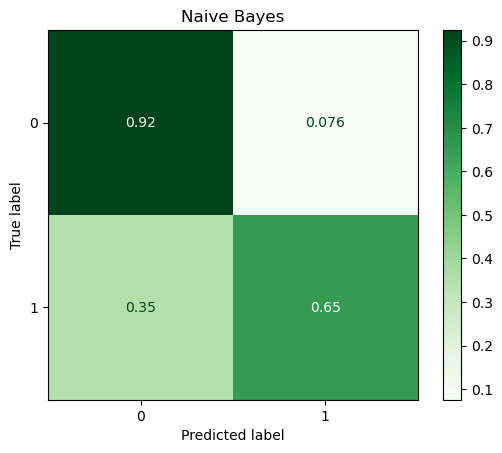

Model Name                Logistic Regression
Model state                 TF-IDF Vectorizer
Train-Val Accuracy                  78.917516
Test Accuracy                       80.829832
f1_score                            75.051265
Real Disaster Accuracy                   0.91
Not Disaster Accuracy                    0.67
Name: 11, dtype: object


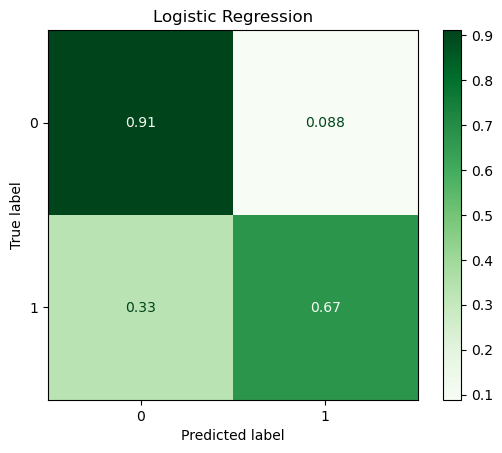

Model Name                              SVC
Model state               TF-IDF Vectorizer
Train-Val Accuracy                78.251919
Test Accuracy                     79.044118
f1_score                          74.373796
Real Disaster Accuracy                 0.85
Not Disaster Accuracy                  0.71
Name: 12, dtype: object


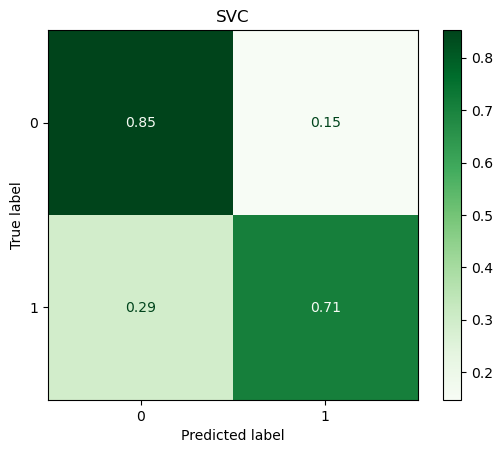

Model Name                              KNN
Model state               TF-IDF Vectorizer
Train-Val Accuracy                75.396725
Test Accuracy                      79.14916
f1_score                          73.691186
Real Disaster Accuracy                 0.88
Not Disaster Accuracy                  0.68
Name: 13, dtype: object


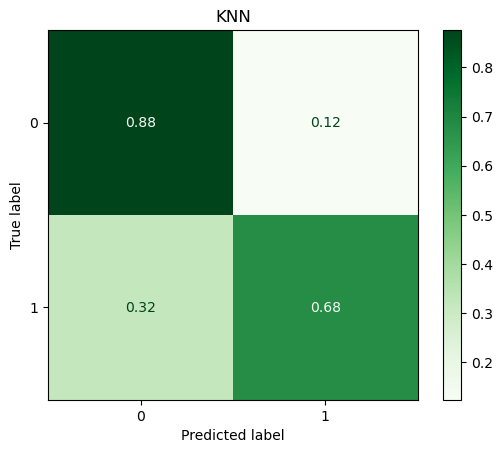

Model Name                          XGBoost
Model state               TF-IDF Vectorizer
Train-Val Accuracy                76.657868
Test Accuracy                     77.678571
f1_score                           70.34194
Real Disaster Accuracy                  0.9
Not Disaster Accuracy                  0.62
Name: 14, dtype: object


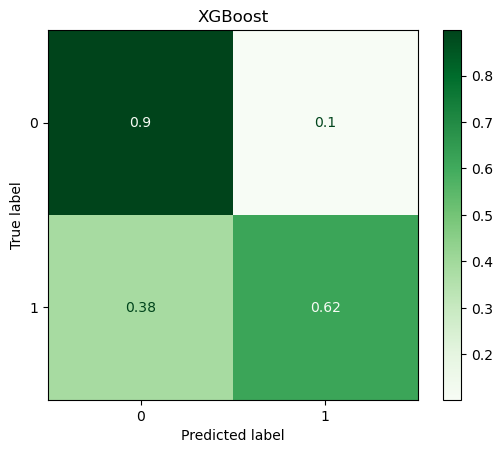

In [32]:
for model_name, model in models.items():
    fit_model_result(X_train_vectorized.values, y_train, X_test_vectorized.values, y_test, model, model_name, "TF-IDF Vectorizer")

-----------
## Models Summary

In [34]:
results.sort_values(by="f1_score", ascending=False)

,Model Name,Model state,Train-Val Accuracy,Test Accuracy,f1_score,Real Disaster Accuracy,Not Disaster Accuracy
0,Naive Bayes,Binary Vectorizer,78.476017,81.144958,76.703439,0.88,0.72
5,Naive Bayes,Count Vectorizer,78.584610,80.672269,76.072822,0.88,0.72
11,Logistic Regression,TF-IDF Vectorizer,78.917516,80.829832,75.051265,0.91,0.67
6,Logistic Regression,Count Vectorizer,78.928113,79.726891,74.538259,0.88,0.69
10,Naive Bayes,TF-IDF Vectorizer,79.183725,80.777311,74.476987,0.92,0.65
1,Logistic Regression,Binary Vectorizer,79.075171,79.621849,74.440053,0.88,0.69
12,SVC,TF-IDF Vectorizer,78.251919,79.044118,74.373796,0.85,0.71
13,KNN,TF-IDF Vectorizer,75.396725,79.149160,73.691186,0.88,0.68
2,SVC,Binary Vectorizer,76.875202,77.363445,72.704243,0.83,0.70
7,SVC,Count Vectorizer,76.910232,77.521008,72.634271,0.84,0.69


<Axes: ylabel='Model Name'>

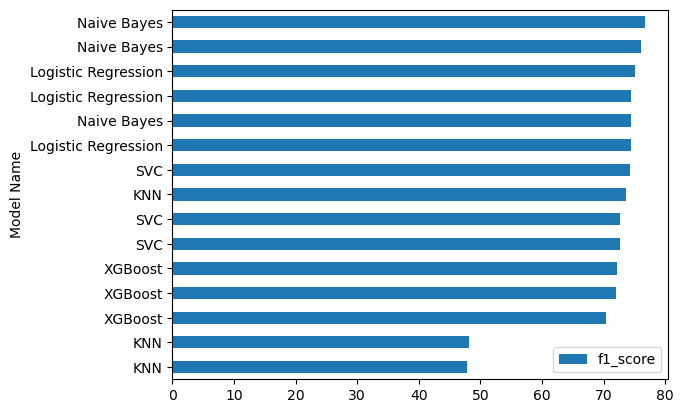

In [35]:
results.sort_values(by="f1_score").plot.barh(y = "f1_score", x = "Model Name")